<a href="https://colab.research.google.com/github/horasan/ml/blob/main/ceb_1_simple_linear_regression_icecream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import drive
import seaborn as sns
%matplotlib inline

In [2]:
# read data from google drive
drive.mount('/content/drive')
DRIVE_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/datasets/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IceCream = pd.read_csv(DRIVE_DATASET_PATH + "IceCreamData.csv")

In [4]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685944,343.362905


In [5]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


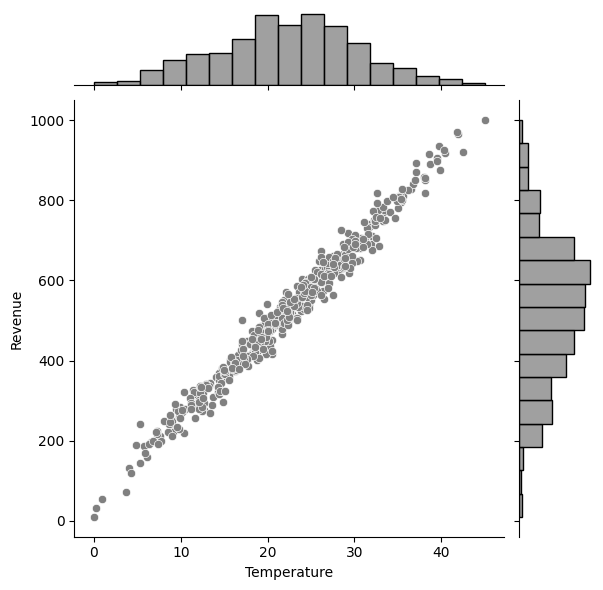

In [8]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream, color = 'gray')

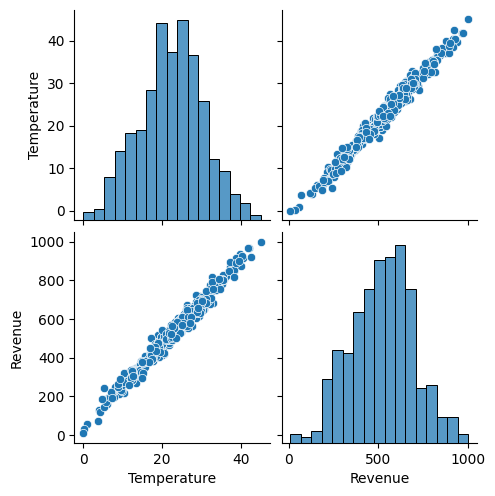

In [9]:
sns.pairplot(IceCream)

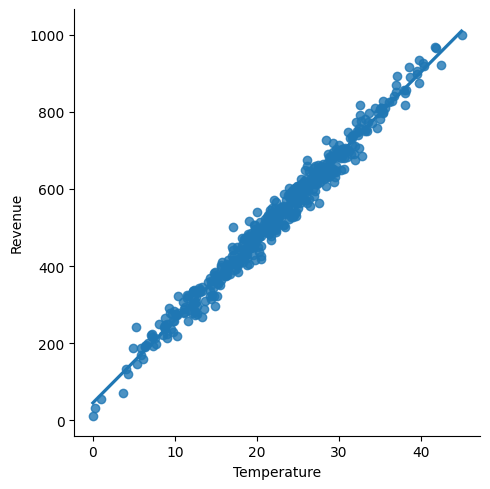

In [10]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

In [11]:
y = IceCream['Revenue']
X = IceCream[['Temperature']]

In [12]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
X_train.shape

(375, 1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(fit_intercept = True)

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.26474367]
Linear Model Coefficient (b):  49.893536163845795


In [20]:
y_predict = regressor.predict( X_test)
y_predict

array([675.72724362, 395.63106511, 590.50599088, 605.46136177,
       602.69167335, 612.47467497, 449.92215214, 455.18437877,
       651.08536563, 415.41210425, 127.82179536, 426.06752409,
       532.14730351, 664.44870513, 559.7355742 , 383.25000558,
       220.71647481, 626.7662386 , 163.41351326, 249.85611116,
       236.83089425, 429.92000348, 373.42745494, 796.17536771,
       415.63500682, 174.47206465, 527.24522317, 693.09351695,
       573.61464647, 836.62704271, 740.25281574, 449.10788662,
       310.8324987 , 570.55884177, 401.99405525, 953.97007617,
       546.40476317, 458.23977157, 601.1856521 , 522.5050645 ,
       590.428476  , 606.85264611, 355.28553946, 314.28106172,
       317.57746699, 483.9288829 , 398.20096255, 576.79557717,
       451.97770051, 339.61522599, 635.29560192, 539.05682903,
       622.41710794, 525.42429042, 405.09666343, 737.48494163,
       459.84954818, 371.05329926, 134.66592947, 630.89572636,
       503.30874436, 547.75536381, 682.90717821, 685.28

In [21]:
y_test

,Revenue
146,618.235765
23,374.231135
246,583.759781
378,594.872470
166,570.577875
...,...
6,308.894518
238,675.807151
297,857.526641
95,212.591740


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

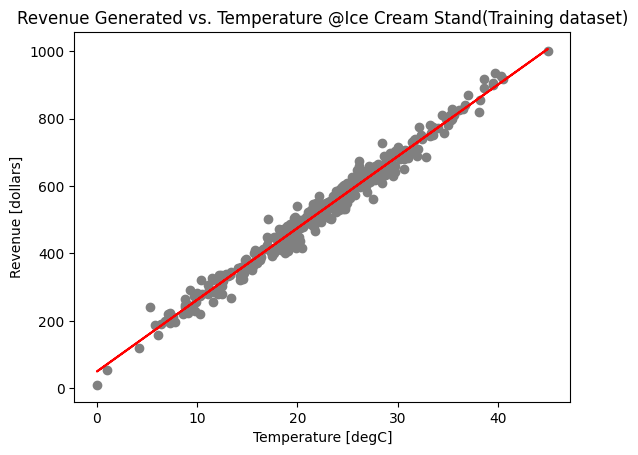

In [22]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Test dataset)')

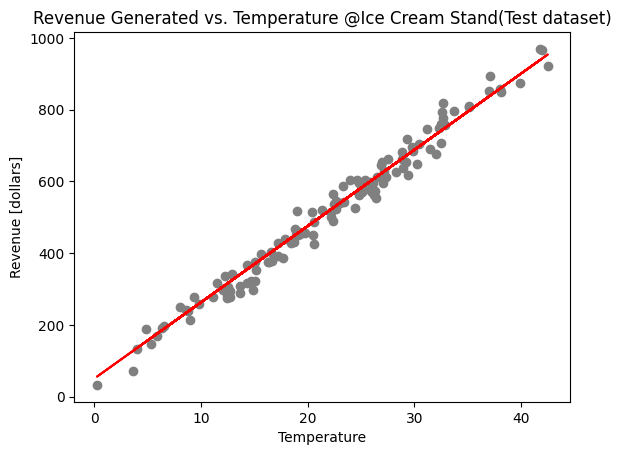

In [23]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Test dataset)')

In [27]:
y_predict = regressor.predict([[30], [15]])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([687.83584629, 368.86469123])